In [2]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


## sample code

### イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [4]:
#!pip install tensorflow==2.2.0

In [5]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt
import cv2

from PIL import Image

%matplotlib inline

#### osを使用する場合

In [6]:
path = '/content/drive/My Drive/Colab Notebooks/S18/S18_data'

flist = os.listdir(path)

In [7]:
flist

['cat1.jpg',
 'cat2.jpg',
 'cat3.jpeg',
 'cat4.jpg',
 'cat5.jpg',
 'dog1.jpg',
 'dog2.jpg',
 'dog3.jpg',
 'dog4.jpg',
 'dog5.jpg',
 'cat3.jpg',
 'cat1.xml',
 'cat2.xml',
 'cat3.xml',
 'cat4.xml',
 'cat5.xml',
 'dog1.xml',
 'dog2.xml',
 'dog3.xml',
 'dog4.xml',
 'dog5.xml']

In [8]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat1.jpg',
 'cat2.jpg',
 'cat3.jpeg',
 'cat4.jpg',
 'cat5.jpg',
 'dog1.jpg',
 'dog2.jpg',
 'dog3.jpg',
 'dog4.jpg',
 'dog5.jpg',
 'cat3.jpg',
 'cat1.xml',
 'cat2.xml',
 'cat3.xml',
 'cat4.xml',
 'cat5.xml',
 'dog1.xml',
 'dog2.xml',
 'dog3.xml',
 'dog4.xml',
 'dog5.xml']

#### globを使用する場合

In [9]:
img_list = glob.glob(path + '/*' + ".jpg")

In [10]:
img_list 

['/content/drive/My Drive/Colab Notebooks/S18/S18_data/cat1.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/cat2.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/cat4.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/cat5.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/dog1.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/dog2.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/dog3.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/dog4.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/dog5.jpg',
 '/content/drive/My Drive/Colab Notebooks/S18/S18_data/cat3.jpg']

### イメージのロード、配列化、リサイズ、データセット作成

In [11]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [12]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


### イメージの出力

In [13]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.0745098 , 0.06666667, 0.05882353],
        [0.11764706, 0.07058824, 0.05098039],
        [0.15686275, 0.07843137, 0.0627451 ],
        ...,
        [0.40784314, 0.22745098, 0.16078431],
        [0.46666667, 0.26666667, 0.19215686],
        [0.45882353, 0.26666667, 0.18823529]],

       [[0.08235294, 0.07843137, 0.06666667],
        [0.12941176, 0.08235294, 0.0627451 ],
        [0.16470588, 0.08627451, 0.07058824],
        ...,
        [0.41568627, 0.23137255, 0.16078431],
        [0.45490196, 0.25490196, 0.18039216],
        [0.46666667, 0.27843137, 0.19607843]],

       [[0.08627451, 0.07843137, 0.07058824],
        [0.10980392, 0.0627451 , 0.04313725],
        [0.17647059, 0.09803922, 0.08235294],
        ...,
        [0.43529412, 0.25490196, 0.17647059],
        [0.4627451 , 0.27058824, 0.18823529],
        [0.4627451 , 0.27843137, 0.19607843]],

       ...,

       [[0.81568627, 0.81176471, 0.83137255],
        [0.82352941, 0.81960784, 0.83921569],
        [0.84313725, 0

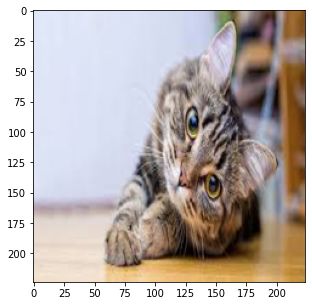

In [14]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[4])

plt.show()

In [15]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


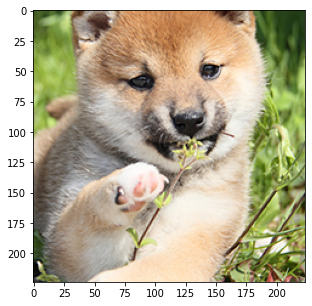

In [16]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

#### Kerasでも読み込んでみよう

In [17]:
#!pip install keras

In [18]:
from keras.preprocessing.image import load_img, img_to_array

In [19]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.6       , 0.70980394, 0.3764706 ],
        [0.60784316, 0.69411767, 0.36862746],
        [0.58431375, 0.6784314 , 0.34117648],
        ...,
        [0.12941177, 0.18039216, 0.07843138],
        [0.14117648, 0.1764706 , 0.10196079],
        [0.12156863, 0.14901961, 0.08627451]],

       [[0.6039216 , 0.69803923, 0.36078432],
        [0.5921569 , 0.6862745 , 0.35686275],
        [0.5882353 , 0.6666667 , 0.31764707],
        ...,
        [0.13725491, 0.18431373, 0.09019608],
        [0.12941177, 0.1764706 , 0.08235294],
        [0.11764706, 0.13333334, 0.07843138]],

       [[0.5882353 , 0.6862745 , 0.32941177],
        [0.58431375, 0.6784314 , 0.34901962],
        [0.5921569 , 0.6627451 , 0.3254902 ],
        ...,
        [0.13333334, 0.1882353 , 0.09019608],
        [0.14117648, 0.16078432, 0.08235294],
        [0.11372549, 0.12156863, 0.07058824]],

       ...,

       [[0.88235295, 0.8862745 , 0.8666667 ],
        [0.90588236, 0.9098039 , 0.8901961 ],
        [0.9098039 , 0

<class 'PIL.Image.Image'>


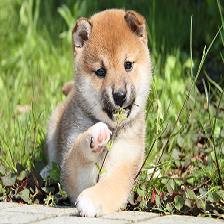

In [20]:
print(type(img_keras))

img_keras

#### Resizeについて

In [21]:
import cv2

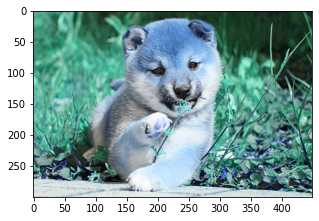

In [22]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

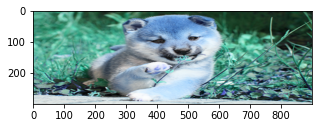

In [23]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

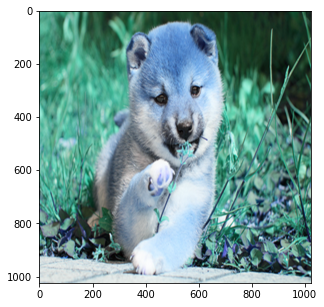

In [24]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

### openCVの色形式

#### グレースケール 

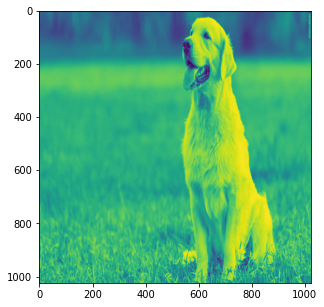

In [25]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [26]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

#### BGRとRGB

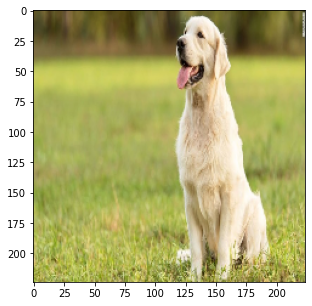

In [27]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

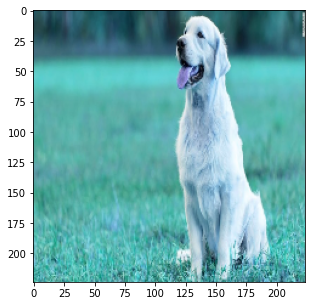

In [28]:
# BGRチャネル

plt.imshow(img)

plt.show()

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [29]:
''' memo
cat_img_array
dog_img_array
img_keras_array

# 配列を画像として出力
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(cat_img_array[4])
plt.show()
'''

" memo\ncat_img_array\ndog_img_array\nimg_keras_array\n\n# 配列を画像として出力\nplt.rcParams['figure.figsize'] = (5.0, 5.0)\nplt.imshow(cat_img_array[4])\nplt.show()\n"

In [30]:
X = np.concatenate((cat_img_array, dog_img_array))
X.shape # NHWC

(10, 224, 224, 3)

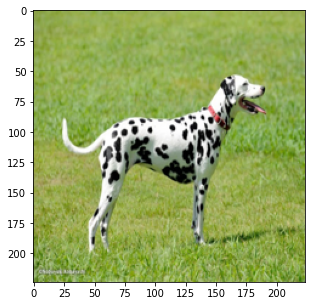

In [31]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(X[9])
plt.show()

正解ラベルデータ

猫：０

犬：１

In [32]:
y = np.concatenate((np.zeros(5), np.ones(5)))

In [33]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [34]:
from sklearn.model_selection import train_test_split

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

Keras CNN 犬猫分類

In [35]:
import time
import tensorflow as tf
from tensorflow import keras

In [36]:
keras.backend.clear_session()

input_data = keras.layers.Input(shape=(224,224,3))  # channels last

l = keras.layers.Conv2D(8, (3,3), padding='valid', activation=tf.nn.relu)(input_data)
l = keras.layers.MaxPool2D((3,3), padding='same')(l)

l = keras.layers.Conv2D(16, (3,3), padding='valid', activation=tf.nn.relu)(l)
l = keras.layers.MaxPool2D((3,3), padding='same')(l)

l = keras.layers.Conv2D(32, (3,3), padding='valid', activation=tf.nn.relu)(l)
l = keras.layers.MaxPool2D((3,3), padding='same')(l)

l = keras.layers.Flatten()(l)
output = keras.layers.Dense(1, activation=tf.nn.sigmoid)(l)

model = keras.Model(input_data, output)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)         

In [37]:
start = time.time()
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_val, y_val))
end = time.time()
print('wall time: {:.4f}sec'.format(end-start))

score = model.evaluate(X_val, y_val, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

wall time: 10.5184sec

Test loss: 0.6931521892547607
Test accuracy: 0.5


## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries


また、Kerasを使う場合はImageDataGeneratorも便利です。


In [38]:
!pip install albumentations

     |████████████████████████████████| 634kB 7.0MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=d08f3ca30537f8c2617982d42f0336c4e0bbb5ebd2fbf0b145d5e7da217ac069
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [39]:
import albumentations as albu

In [40]:
# 拡張用関数を定義
def augment(aug, image):
    return aug(image=image)['image']

In [41]:
def show_augmentation(aug, subtitle):
  fig = plt.figure(figsize=(20,5), facecolor='w')
  for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(augment(aug, np.array(X[i])))
      plt.axis('off')
      fig.suptitle(subtitle)

元の画像を確認

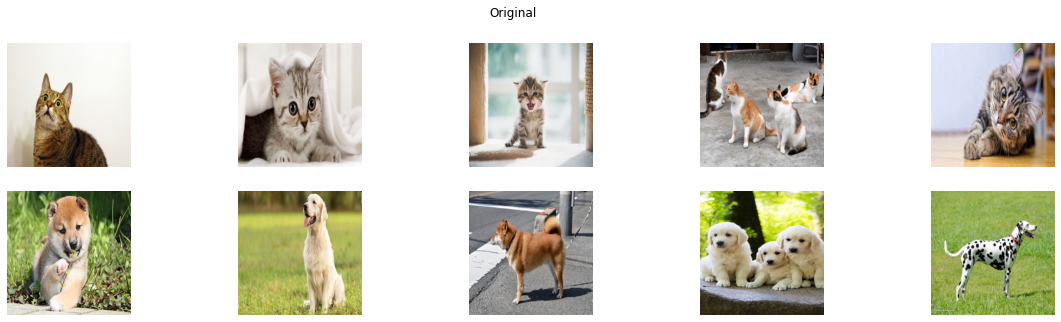

In [42]:
fig = plt.figure(figsize=(20,5), facecolor='w')
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(np.array(X[i]))
  plt.axis('off')
  fig.suptitle('Original')

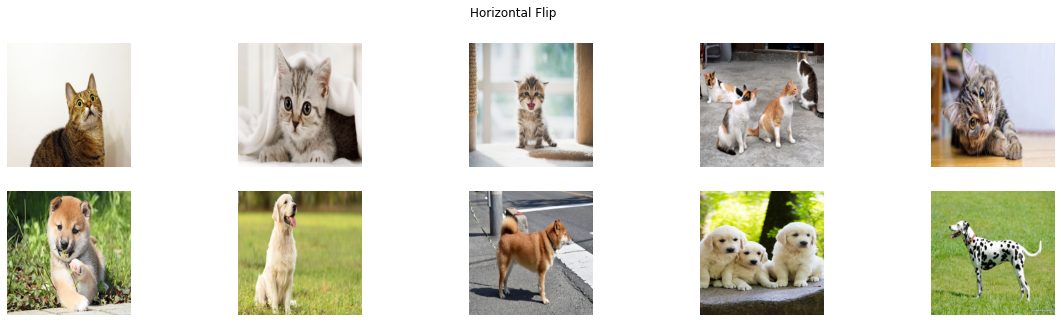

In [43]:
aug = albu.HorizontalFlip(p=1)
subtitle = 'Horizontal Flip'

show_augmentation(aug, subtitle)

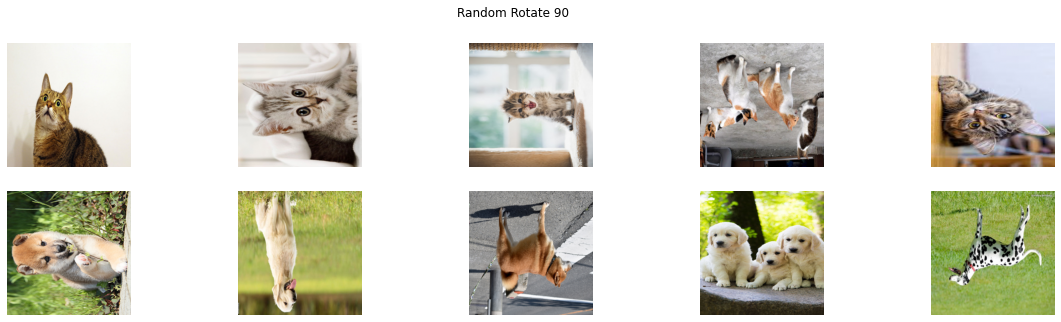

In [44]:
aug = albu.RandomRotate90(p=1)
subtitle = 'Random Rotate 90'

show_augmentation(aug, subtitle)

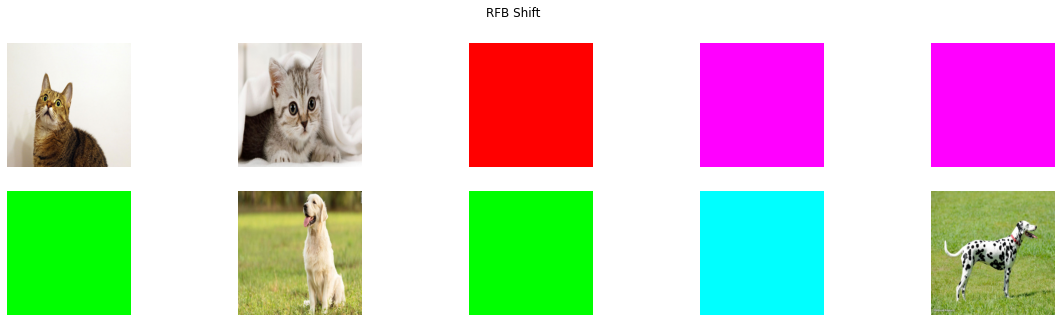

In [45]:
aug = albu.RGBShift(r_shift_limit=105, g_shift_limit=45, b_shift_limit=40, p=0.5)
subtitle = 'RFB Shift'

show_augmentation(aug, subtitle)

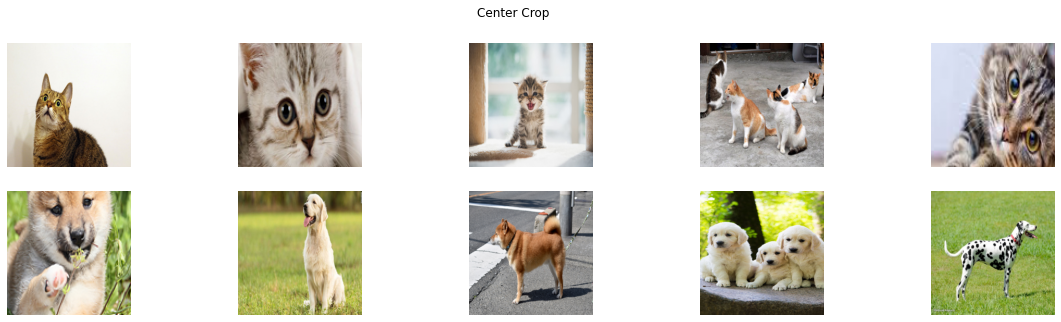

In [46]:
aug = albu.CenterCrop(height=114, width=114, p=0.5)
subtitle = 'Center Crop'

show_augmentation(aug, subtitle)

参照した[Example](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example.ipynb)

In [47]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [71]:
import random

import albumentations as A

import numpy as np

def strong_aug(p=0.5):
  return A.Compose([
          A.RandomRotate90(),
          A.Flip(),
          A.Transpose(),
          A.OneOf([
              A.IAAAdditiveGaussianNoise(),
              A.GaussNoise(),
          ], p=0.2),
          A.OneOf([
              A.MotionBlur(p=.2),
              A.MedianBlur(blur_limit=3, p=0.1),
              A.Blur(blur_limit=3, p=0.1),
          ], p=0.2),
          A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
          A.OneOf([
              A.OpticalDistortion(p=0.3),
              A.GridDistortion(p=.1),
              A.IAAPiecewiseAffine(p=0.3),
          ], p=0.2),
          A.OneOf([
              A.CLAHE(clip_limit=2),
              A.IAASharpen(),
              A.IAAEmboss(),
              A.RandomBrightnessContrast(),            
          ], p=0.3),
          A.HueSaturationValue(p=0.3),
      ])

Text(0.5, 0.98, 'Strong Augmentation')

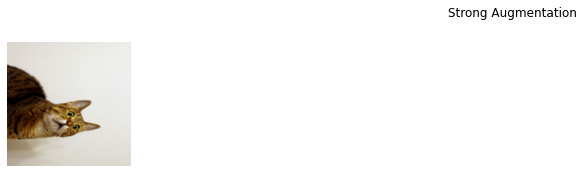

In [74]:
fig = plt.figure(figsize=(20,5))
i = 0
plt.subplot(2, 5, i+1)
plt.imshow(strong_aug(p=1)(image=X[i])['image'])
plt.axis('off')
fig.suptitle('Strong Augmentation')

Text(0.5, 0.98, 'Strong Augmentation')

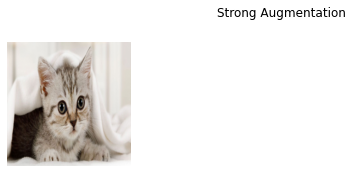

In [86]:
fig = plt.figure(figsize=(20,5))
i = 1
plt.subplot(2, 5, i+1)
plt.imshow(strong_aug(p=1)(image=X[i])['image'])
plt.axis('off')
fig.suptitle('Strong Augmentation')

Text(0.5, 0.98, 'Strong Augmentation')

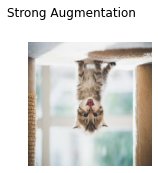

In [87]:
fig = plt.figure(figsize=(20,5))
i = 2
plt.subplot(2, 5, i+1)
plt.imshow(strong_aug(p=1)(image=X[i])['image'])
plt.axis('off')
fig.suptitle('Strong Augmentation')

error: ignored

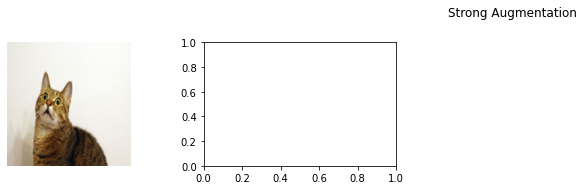

In [93]:
fig = plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(strong_aug(p=1)(image=np.array(X[i]))['image'])

    plt.axis('off')
    fig.suptitle('Strong Augmentation')

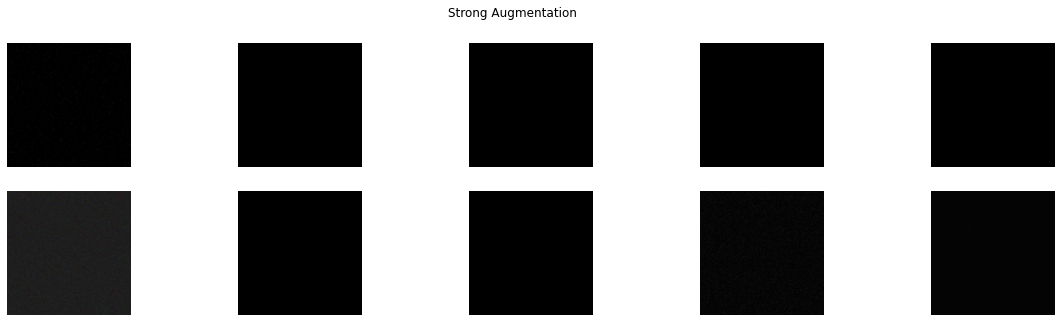

In [89]:
fig = plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(strong_aug(p=1)(image=cv2.cvtColor(np.array(X[i], np.uint8), cv2.COLOR_RGB2BGR))['image'])

    plt.axis('off')
    fig.suptitle('Strong Augmentation')

for を使って連続したDAはうまくいかなかった。

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images

[LabelImg tutorial](https://www.loom.com/share/cfebe6dbea03462fac0da842e5389a7d)

anotation file (xml)　の確認

In [119]:
ANOT_PATH = ('/content/drive/My Drive/Colab Notebooks/S18/data/')

# labellmgの出力フォーマットを確認
print(np.loadtxt(ANOT_PATH+'cat1.txt', dtype=str)) # [class, bounding box coord]

['2' '0.513889' '0.612500' '0.616667' '0.775000']


In [124]:
# yolo用アノテーションファイルを準備

annotations = []
for file in os.listdir(ANOT_PATH):
    if '.txt' in file:
        txt = np.loadtxt(ANOT_PATH+file, dtype=str)
        txt[0:-1], txt[-1] = txt[1:], txt[0] # 要素の位置を入れ替え、classを末尾へ
        annotations.append([file.rstrip('.txt')+'.jpg', ','.join((txt))])

annotations = np.array(annotations)
np.savetxt(ANOT_PATH+'train.txt', annotations, fmt='%s %s')

TypeError: ignored

In [112]:
import PIL

testset = []

BASE_PATH = ANO_PATH + 'test/'
for image in os.listdir(BASE_PATH):
    if '.jpg' in image:
        im = PIL.Image.open(BASE_PATH+image)
        im_rgb = im.convert('RGB')
        testset.append(im_rgb)

In [113]:
# BBoxをターゲットできない拡張手法を除外

def strong_aug_bbcompat(p=0.5):
    return Compose([
        Resize(256, 256),
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
#             OpticalDistortion(p=0.3),
#             GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], bbox_params=albu.BboxParams(format='pascal_voc', label_fields=['category_id']))

In [100]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
#     plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    
def yolo_to_xywh(image, bbox):
    yolo_x, yolo_y, yolo_width, yolo_height = bbox
    image_height, image_width = image
    
    x_center = yolo_x * image_width
    y_center = yolo_y * image_height
    width = yolo_width * image_width
    height = yolo_height * image_height

    x_left = (yolo_x - yolo_width/2) * image_width
    y_top = (yolo_y - yolo_height/2) * image_height
    
    return x_left, y_top, width, height

In [ ]:
fig = plt.figure(figsize=(20,30))
for i, line in enumerate(annotations):
    image = PIL.Image.open(BASE_PATH+line[0]).convert('RGB')
    image = np.array(image)
    bbox_yolo = list(map(float, line[1].split(',')))[:-1]
    bbox = np.array(yolo_to_xywh(image.shape[:2], bbox_yolo))[None,:]
    category_id = [int(list(line[1].split(','))[-1])]
    
    anot_dic = {'image': image, 'bboxes': bbox, 'category_id': category_id}
    category_id_to_name={0: 'dog', 2: 'cat'}

    plt.subplot(5, 2, i+1)
    visualize(anot_dic, category_id_to_name)
    plt.axis('off')
    fig.suptitle('BBox Visualization of Original', fontsize=20, y=0.9)

In [ ]:
fig = plt.figure(figsize=(20,5))
for i, line in enumerate(annotations):
    image = PIL.Image.open(BASE_PATH+line[0]).convert('RGB')
    image = np.array(image)
    bbox_yolo = list(map(float, line[1].split(',')))[:-1]
    bbox = np.array(yolo_to_xywh(image.shape[:2], bbox_yolo))[None,:]
    category_id = [int(list(line[1].split(','))[-1])]
    
    anot_dic = {'image': image, 'bboxes': bbox, 'category_id': category_id}
    category_id_to_name={0: 'dog', 2: 'cat'}
    
    apply_aug = strong_aug_bbcompat(p=1)(**anot_dic)

    plt.subplot(2, 5, i+1)
    visualize(apply_aug, category_id_to_name)
    plt.axis('off')
    fig.suptitle('BBox Visualization after Augmentation')

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。